In [1]:
# General
import os
from os.path import join

# Data wrangling
import pandas as pd
from objects import Dataset, Model

In [2]:
CURRENT_DIR = os.getcwd()
balanced_df = pd.read_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'balanced_df.pkl'))
enzyme_df = pd.read_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'enzyme_df.pkl'))

In [3]:
data_esm1b = Dataset(balanced_df)
data_esm1b.train_test('ESM1b', 'fingerprint', 0.8)

In [ ]:
data_esm2 = Dataset(balanced_df)
data_esm2.train_test('ESM2', 'fingerprint', 0.8)

Best hyperparameters: {'max_depth': 7, 'learning_rate': 0.06424288643995726, 'n_estimators': 720, 'gamma': 3.294197927843035, 'min_child_weight': 9, 'subsample': 0.9132818823428164, 'colsample_bytree': 0.8405174194023304, 'reg_alpha': 0.5887895591101624, 'reg_lambda': 0.544693886257836}
Accuracy: 0.8711597999523696
Area Under ROC Curve: 0.7565229444528165
Confusion Matrix:
 [[6208   87]
 [ 995 1108]]


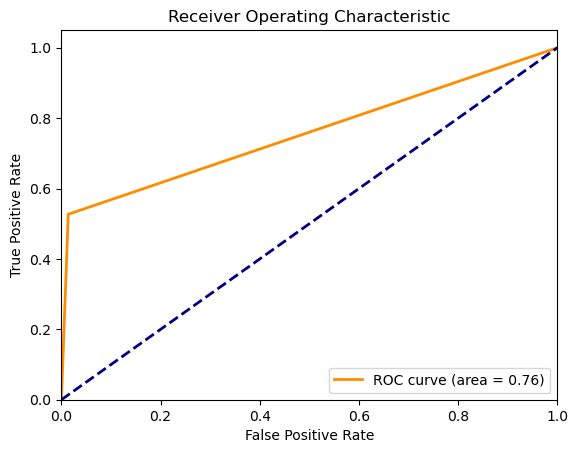

In [4]:
model = Model(data_esm1b)
model.evaluate(model_name = 'xgb', tune = True, n_trials = 20)

In [7]:
wrongly_classified_df = model.get_wrongly_classified()
wrongly_classified_df.to_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'wrongly_classified_df.pkl'))

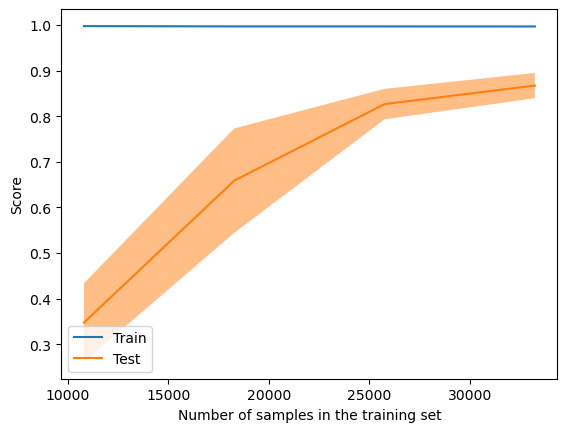

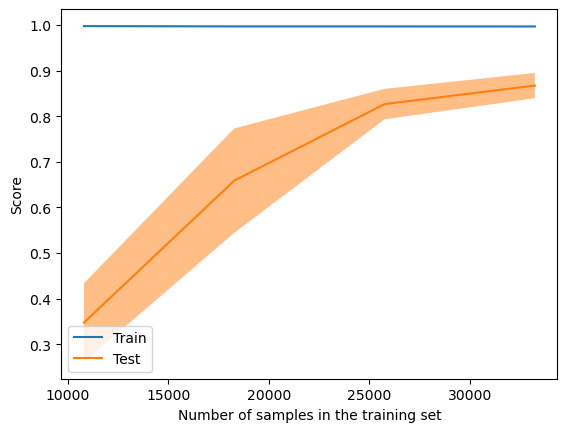

In [64]:
model.plot_learning_curve()

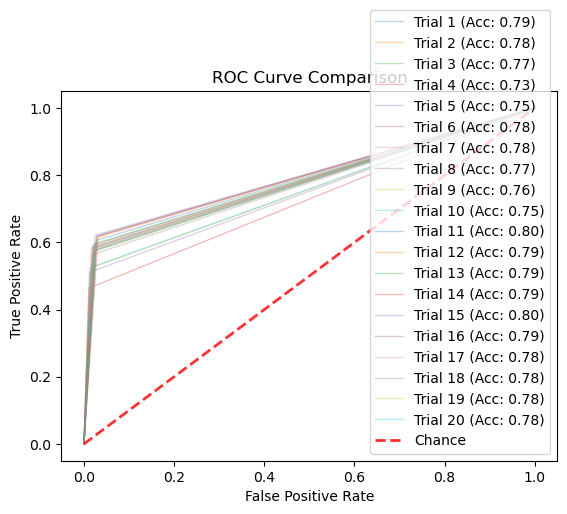

In [65]:
model.plot_roc_comparison()

Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.08363340128043335, 'n_estimators': 998, 'gamma': 0.07043208969820236, 'min_child_weight': 3, 'subsample': 0.8447995364659867, 'colsample_bytree': 0.9764991100073985, 'reg_alpha': 0.7015955019768596, 'reg_lambda': 0.40066459813568933}
Accuracy: 0.8736436821841093
Area Under ROC Curve: 0.7648965160042717
Confusion Matrix:
 [[6313  109]
 [ 974 1175]]


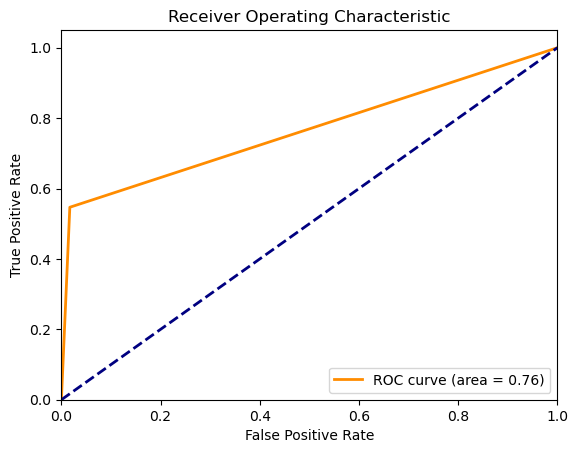

In [66]:
model = Model(data_esm2)
model.evaluate(model_name = 'xgb', tune = True, n_trials = 20)

/Users/pablocanocarciofa/anaconda3/envs/msc/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pablocanocarciofa/anaconda3/envs/msc/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best hyperparameters: {'C': 4.483181281233341, 'max_iter': 949, 'solver': 'lbfgs'}
Accuracy: 0.85956089782902
Area Under ROC Curve: 0.7599538344343898
Confusion Matrix:
 [[5863  246]
 [ 899 1145]]


/Users/pablocanocarciofa/anaconda3/envs/msc/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


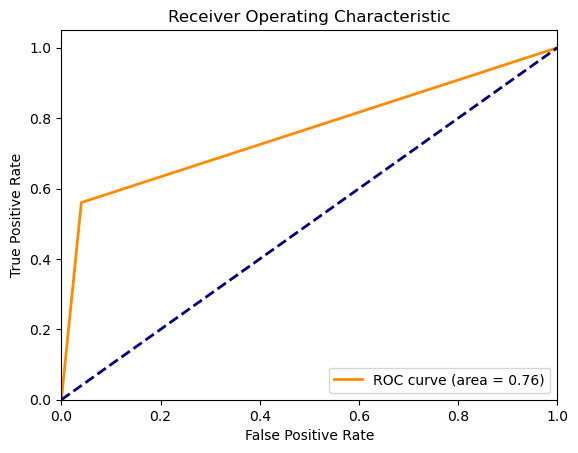

In [67]:
model = Model(data_esm1b)
model.evaluate(model_name = 'lr', tune = True, n_trials = 5)

/Users/pablocanocarciofa/anaconda3/envs/msc/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pablocanocarciofa/anaconda3/envs/msc/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best hyperparameters: {'C': 7.836244709130121, 'max_iter': 951, 'solver': 'liblinear'}
Accuracy: 0.8541593746353985
Area Under ROC Curve: 0.7466308302993476
Confusion Matrix:
 [[6180  242]
 [1008 1141]]


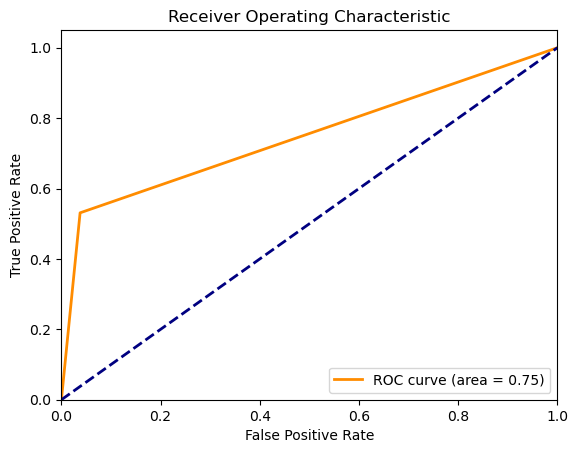

In [68]:
model = Model(data_esm2)
model.evaluate(model_name = 'lr', tune = True, n_trials = 5)

Best hyperparameters: {'C': 4.557302328499989, 'kernel': 'sigmoid', 'gamma': 'scale'}
Accuracy: 0.8362437416045915
Area Under ROC Curve: 0.706230298888752
Confusion Matrix:
 [[5934  205]
 [1136  914]]


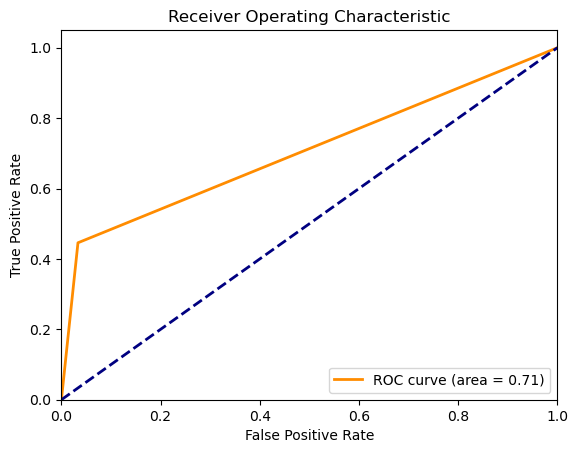

In [6]:
model = Model(data_esm1b)
model.evaluate(model_name = 'svm', tune = True, n_trials = 1)

In [7]:
model = Model(data_esm2)
model.evaluate(model_name = 'svm', tune = True, n_trials = 1)

Best hyperparameters: {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'ball_tree'}
Accuracy: 0.8425567907201547
Area Under ROC Curve: 0.7778999377781116
Confusion Matrix:
 [[5629  574]
 [ 729 1344]]


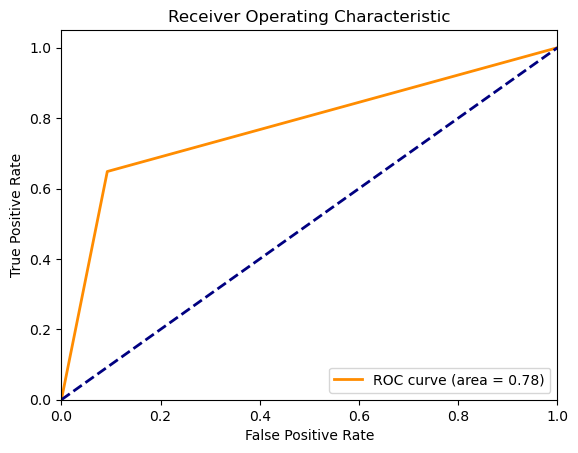

In [6]:
model = Model(data_esm1b)
model.evaluate(model_name = 'knn', tune = True, n_trials = 1)

In [ ]:
model = Model(data_esm2)
model.evaluate(model_name = 'knn', tune = True, n_trials = 5)